<a href="https://colab.research.google.com/github/Sathishk2/Linear-Regression/blob/main/NN_Boston_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ex: Regression for Boston Housing Price using NN**

In [ ]:
import tensorflow as tf
print(tf.__version__)

#
# Check if we got GPU
#
print(tf.test.gpu_device_name()) #Returns the name of a GPU device if available

2.15.0
/device:GPU:0


In [ ]:
#
# Mount drive to connect to Google Drive (for accessing input data file)
#
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Step 1 Prepare Data#

###1.1 Import Raw Data###



In [ ]:
import pandas as pd

# Read in the dataset: 13 features, 1 target
X = pd.read_csv ('/content/drive/MyDrive/BostonHousing.csv')
print(X.shape)
print(X.head(10))

(506, 14)
      crim    zn  indus  chas    nox     rm    age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7 

###1.2 Clean Data###

In [ ]:
#
# Remove any missing data
#
X = X.dropna() # we don't have NaN data in BostonHousing.csv in this case
print(X.shape)

(506, 14)


In [ ]:
# pop out the target from X to form y
# this is what we want to predict
y = X.pop('medv') #in $K
print(X)
print(y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

###1.3 Normalize Data###

In [ ]:
# we use some utility tools from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalizing X inputs so that all features are in the same order of magnitude
# In this case, they will be in "how many std away from mean" using StandardScaler()
scaler = StandardScaler()

# fit(): Method calculates mean and std parameters and saves them as internal values inside scaler object
# transform(): Method using calculated mean and std parameters to apply the transformation on dataset input
# fit_transform(): Do the fit() and transform() method for transformation of dataset input
X = scaler.fit_transform(X) # all 506 housing data normalized

print(X) #Note: we don't transform y targets

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


###1.4 Split Data###

In [ ]:
# Split 70:30 for training:testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

print(len(X_train), len(X_test)) # 506 x 0.7 = 354.2


354 152


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


#Step 2 Build Model#

###2.1 Create Model###

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential() #Define Dense NN model sequentially
model.add(Dense(64, activation='relu', input_dim=13)) #X input has 13 features
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) # no need sigmoid or softmax, we are interested in the actual value output

In [ ]:
#
# TensorFlow has a useful feature to print out the architecture of the network using summary method
# It can tell you the number of weights and bias required
#
model.summary() #Optional

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###2.2 Compile Model###

In [ ]:
#
# Specify optimizer, loss function and metrics during compilation
#
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error', 'mean_absolute_error']) #ie, reporting in MSE, MAE

#Step 3 Train Model#

In [ ]:
#
# ** Training **
#
# epochs = number of iterations
# batch_size = how much data to randomly used together in each training iteration
#
history = model.fit(X_train, y_train, epochs=1000, batch_size=32)

Epoch 1/1000
12/12 [==============================] - 3s 7ms/step - loss: 595.0525 - mean_squared_error: 595.0525 - mean_absolute_error: 22.6247
Epoch 2/1000
12/12 [==============================] - 0s 4ms/step - loss: 562.1961 - mean_squared_error: 562.1961 - mean_absolute_error: 21.9556
Epoch 3/1000
12/12 [==============================] - 0s 4ms/step - loss: 526.5152 - mean_squared_error: 526.5152 - mean_absolute_error: 21.2087
Epoch 4/1000
12/12 [==============================] - 0s 4ms/step - loss: 480.8734 - mean_squared_error: 480.8734 - mean_absolute_error: 20.2220
Epoch 5/1000
12/12 [==============================] - 0s 3ms/step - loss: 422.6054 - mean_squared_error: 422.6054 - mean_absolute_error: 18.8865
Epoch 6/1000
12/12 [==============================] - 0s 4ms/step - loss: 350.3325 - mean_squared_error: 350.3325 - mean_absolute_error: 17.0243
Epoch 7/1000
12/12 [==============================] - 0s 3ms/step - loss: 269.2778 - mean_squared_error: 269.2778 - mean_absolute_

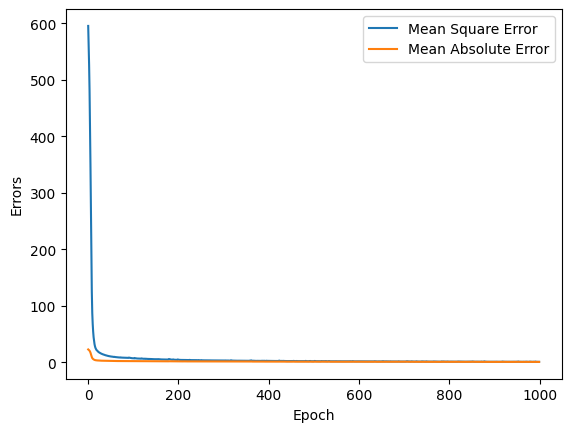

In [ ]:
import matplotlib.pyplot as plt

#
# Visualize Errors (optional)
#
mse = history.history['mean_squared_error']
mae = history.history['mean_absolute_error']
epoch = range(len(mse))

plt.plot(epoch, mse, label='Mean Square Error')
plt.plot(epoch, mae, label='Mean Absolute Error')

plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.legend()
plt.show()

#Step 4 Evaluate Model#

In [ ]:
#
# Evaluate on Testing Data
#
loss, mse, mae=model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 6ms/step - loss: 13.2754 - mean_squared_error: 13.2754 - mean_absolute_error: 2.4766


In [ ]:
#
# Save Model
#
# Saves in HDF5 format:
# 1. Model Architecture
# 2. Weights and Bias
# 3. Optimizer Configuration
#
model.save('/content/drive/MyDrive/app/nn_boston_regression.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Step 5 Make Prediction#

5/5 [==============================] - 0s 3ms/step


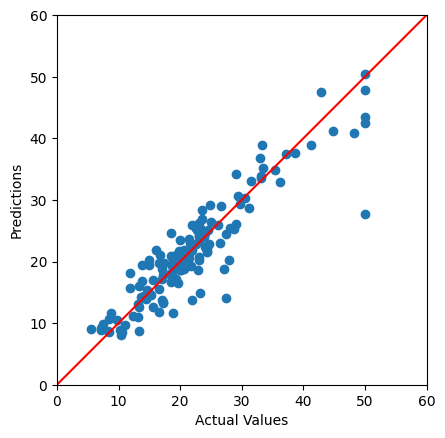

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/app/nn_boston_regression.h5')

test_predictions = loaded_model.predict(X_test) # predict with normalized data, X_test is already normalized

plt.scatter(y_test, test_predictions) #y_test is the actual values
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.axis('equal') #make plot X-Y axis values are equal
plt.axis('square') #center X-Y axis accordingly to show a squarish plot
plt.xlim([0,60]) #set X axis range
plt.ylim([0,60]) #set Y axis range
plt.plot([-100, 100], [-100, 100], 'r') #draw a red line y=x for ref
plt.show()

##Using sklearn metrics to measure MSE and R2 (Pearson's Goodness of Fit)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

#MSE
#Note: We expect this to be the same as above calculated under DL
mse = mean_squared_error(y_test, test_predictions)
print('Mean Squared Error, Testing: ',mse)

#R2
#Value is between -1 and 1 (1 -> very good fit, 0 means no fit)
rsq = r2_score(y_test, test_predictions)
print('R-square, Testing: ',rsq)

Mean Squared Error, Testing:  13.275369720691863
R-square, Testing:  0.8405657870490835


In [ ]:
# Using classical ML Model - Linear Regression Model
# Note: We should see that DL performs better than classical LR
#
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LR = LinearRegression()
LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

#MSE
mse = mean_squared_error(y_test, y_pred) #compare with the actuals
print('Mean Squared Error, Testing: ',mse)

#R2
rsq = r2_score(y_test, y_pred)
print('R-square, Testing: ',rsq)

Mean Squared Error, Testing:  27.195965766883212
R-square, Testing:  0.6733825506400195
